## Step 1

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define column names based on dataset documentation
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Load the dataset, considering spaces as delimiters and "?" as missing values
df = pd.read_csv('auto-mpg.data.txt', delim_whitespace=True, names=column_names, na_values='?')

# Drop the 'Car Name' column as it's non-numeric and not useful for regression
df = df.drop('Car Name', axis=1)

# Convert 'Horsepower' from string to numeric, handling missing values
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Optionally, impute missing values for 'Horsepower' or any other numeric column with missing values
imputer = SimpleImputer(strategy='mean')
df[['Horsepower']] = imputer.fit_transform(df[['Horsepower']])

'\n\n# If \'Origin\' is considered categorical and needs to be encoded, it can be done as follows\n# Note: Adjust this part if \'Origin\' is already numeric or if you decide not to use it as a feature\ncategorical_features = [\'Origin\']\none_hot = OneHotEncoder()\ntransformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")\nX_transformed = transformer.fit_transform(X)\nprint(X_transformed.shape)\n\n\n# Splitting the dataset into training and testing sets (80% training, 20% testing)\nX_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)\n\n# Fitting the linear regression model\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\n# You can now proceed to use the model for predictions and evaluate its performance\n# Predict on the test set\ny_pred = model.predict(X_test)\n\n# Output model metrics\nprint(\'Coefficients:\', model.coef_)\nprint("Mean squared error: %.2f" % mean_squared_error(y_

## Step 2a

In [48]:
# Split the dataset into features and target variable
X = df.drop('MPG', axis=1)
y = df['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2b

In [49]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Output model metrics
print('Coefficients:', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: [-0.15417994  0.01399743 -0.01179845 -0.00677523  0.07488864  0.79647938
  1.31331307]
Mean squared error: 8.20
Variance score: 0.85


## Step 3a and 3b

Feature: Cylinders
Coefficient: -3.626333278591717
Mean squared error: 19.66
Variance score: 0.63


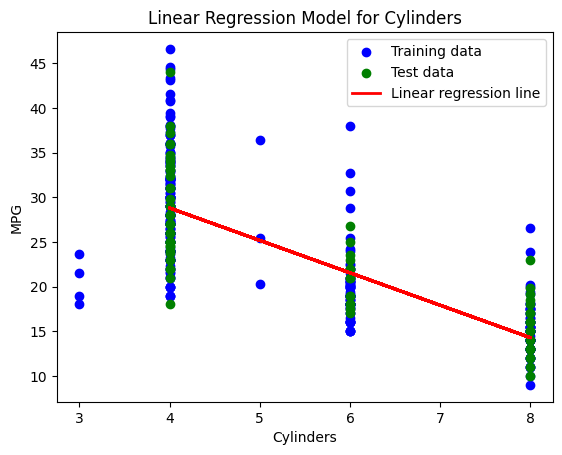

Feature: Displacement
Coefficient: -0.061725205001093006
Mean squared error: 18.10
Variance score: 0.66


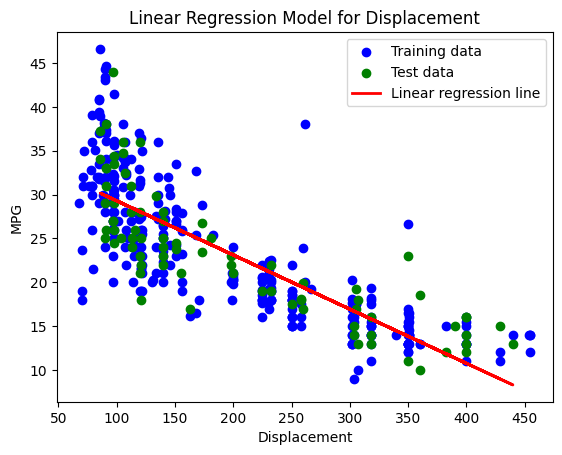

Feature: Horsepower
Coefficient: -0.1634025623115888
Mean squared error: 19.15
Variance score: 0.64


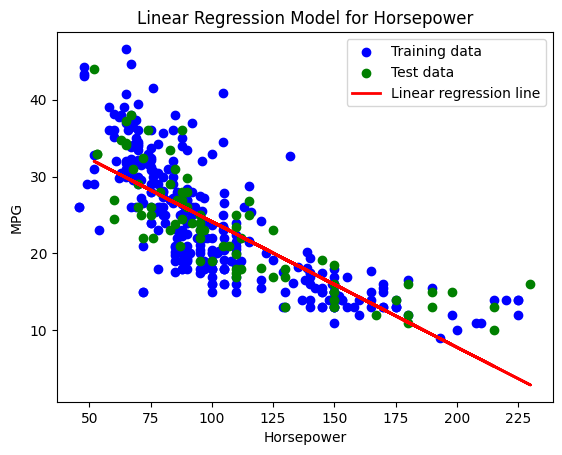

Feature: Weight
Coefficient: -0.00780524235159488
Mean squared error: 14.89
Variance score: 0.72


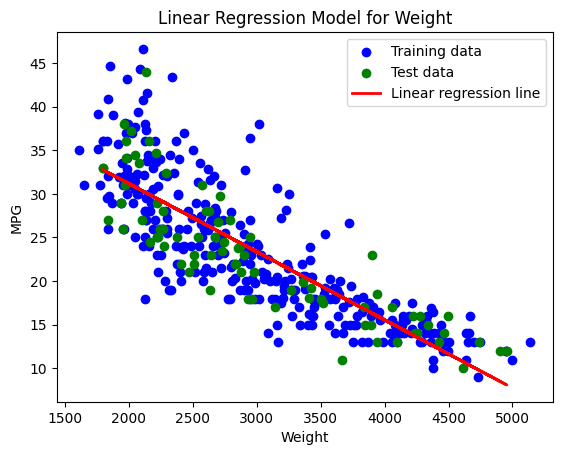

Feature: Acceleration
Coefficient: 1.1195881140605581
Mean squared error: 38.51
Variance score: 0.28


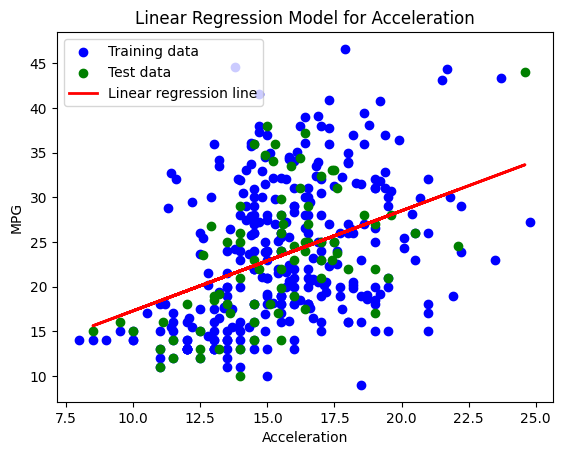

Feature: Model Year
Coefficient: 1.2914184723931874
Mean squared error: 38.32
Variance score: 0.29


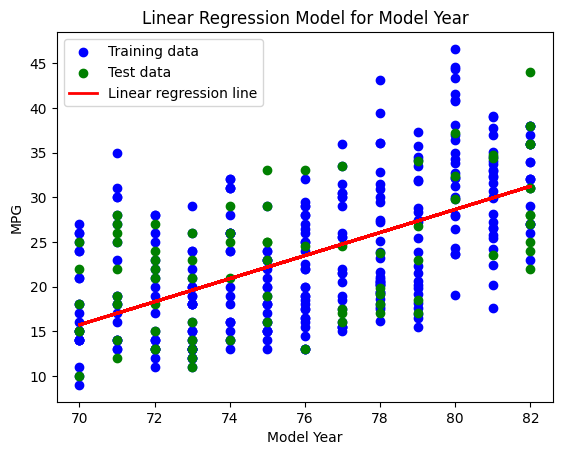

Feature: Origin
Coefficient: 5.497886051553835
Mean squared error: 36.61
Variance score: 0.32


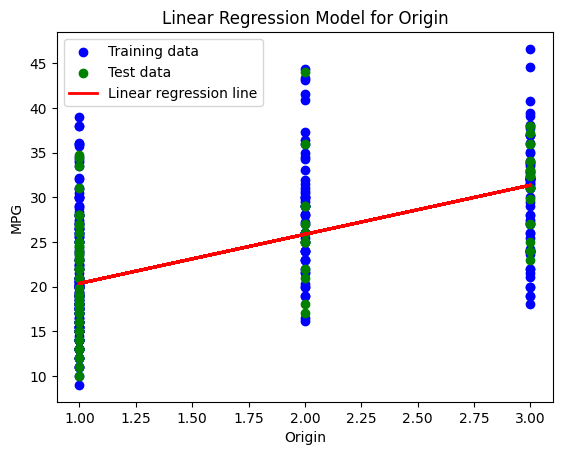

In [52]:
import matplotlib.pyplot as plt

for feature in column_names[1:8]:
    X_single_feature = df[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Reporting metrics
    print(f"Feature: {feature}")
    print('Coefficient:', model.coef_[0])
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    # Plotting
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression line')
    plt.title(f"Linear Regression Model for {feature}")
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()


## Step 4a and 4b

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store metrics for each feature across iterations
mse_scores = {f"Feature_{i}": [] for i in range(1, 8)}
mse_scores["All_Features"] = []
var_scores = {f"Feature_{i}": [] for i in range(1, 8)}
var_scores["All_Features"] = []

In [56]:

# Perform 10 iterations
for iteration in range(10):
    # Split the dataset (Step 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train a model using all features (Step 2(a))
    model_all = LinearRegression()
    model_all.fit(X_train, y_train)
    y_pred_all = model_all.predict(X_test)
    mse_scores["All_Features"].append(mean_squared_error(y_test, y_pred_all))
    var_scores["All_Features"].append(r2_score(y_test, y_pred_all))
    
    # Train a model for each feature alone (Step 3(a))
    for i, feature in enumerate(column_names[1:8], 1):
        X_train_f, X_test_f = X_train[[feature]], X_test[[feature]]
        model = LinearRegression()
        model.fit(X_train_f, y_train)
        y_pred = model.predict(X_test_f)
        mse = mean_squared_error(y_test, y_pred)
        var = r2_score(y_test, y_pred)
        mse_scores[f"Feature_{i}"].append(mse)
        var_scores[f"Feature_{i}"].append(var)


In [57]:
# Compute the average metrics
avg_mse_scores = {feature: np.mean(scores) for feature, scores in mse_scores.items()}
avg_var_scores = {feature: np.mean(scores) for feature, scores in var_scores.items()}

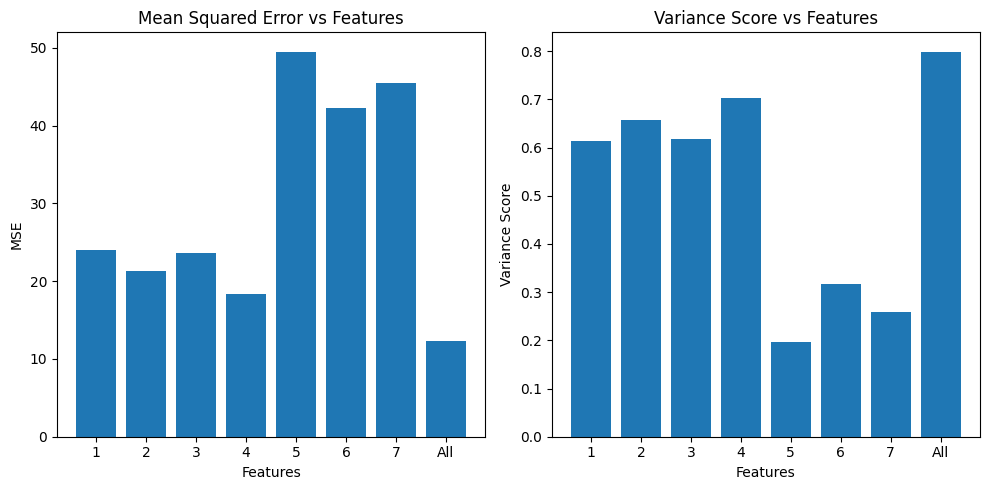

In [58]:
# Convert features to strings for plotting
features_str = [str(feature) for feature in range(1, 8)] + ["All"]

# Now use features_str for plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(features_str, [avg_mse_scores[f"Feature_{i}"] for i in range(1, 8)] + [avg_mse_scores["All_Features"]])
plt.title('Mean Squared Error vs Features')
plt.xlabel('Features')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(features_str, [avg_var_scores[f"Feature_{i}"] for i in range(1, 8)] + [avg_var_scores["All_Features"]])
plt.title('Variance Score vs Features')
plt.xlabel('Features')
plt.ylabel('Variance Score')
plt.tight_layout()
plt.show()

Given this output, respond to the following questions:
1. Based upon the linear models you generated, which feature appears to be most
predictive for the target feature? Note that you can answer this question based
upon the output provided for the linear models.
2. Suppose you need to select two features for a linear regression model to predict
the target feature. Which two features would you select? Why?
3. Examine all the plots and numbers you have, do you have any comments on them?
Do you find any surprising trends? Do you have any idea about what might be
causing this surprising trend in the data? This is a descriptive question meant to
encourage you to interpret your results and express yourself.

1. Based on the variance scores, 'Model Year' seems most predictive for the target feature as it has the highest coefficient and a reasonable variance score when used alone, indicating its strong and positive relationship with the MPG.

2. I would select 'Model Year' and 'Weight'. 'Model Year' has the highest positive coefficient, indicating a strong predictive relationship with MPG. 'Weight' has the next best variance score when used alone, suggesting that it also has a significant impact on MPG. Together, these features may capture both the advancements in technology over time and the physical attributes of the car that affect fuel efficiency.

3. From the plots, it is noticeable that 'Acceleration' and 'Origin' have high coefficients but lower variance scores. This might indicate that while they do impact MPG, they are not as consistent predictors across the dataset as 'Model Year' or 'Weight'. The surprising trend is that 'Acceleration', typically associated with high-performance (and often less fuel-efficient) vehicles, shows a positive coefficient, which is counterintuitive and might be due to an interaction effect with other features or a non-linear relationship not captured by a single-variable linear model.